In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor

from illumine.visual import plain_tree

In [2]:
X1 = np.arange(0, 10, 0.1) + np.random.rand(100)
X2 = np.arange(10, 20, 0.1) + np.random.rand(100)

y = np.sin(X1).ravel() + np.cos(X2).ravel()
X_df = pd.DataFrame(np.array([X1, X2]).T, columns=['x1', 'x2'])

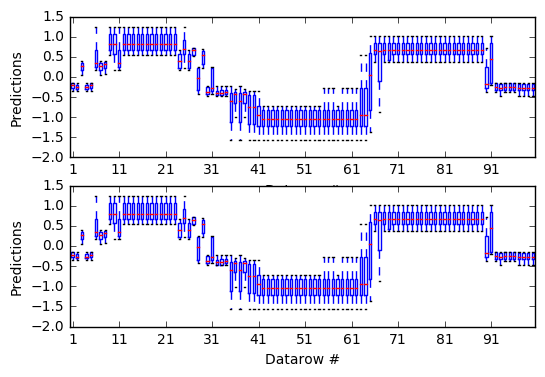

In [3]:
%matplotlib inline

sk_ensemble = GradientBoostingRegressor(n_estimators=10, )
sk_ensemble.fit(X_df, y)
plain_tree.active_leaves_boxplot(sk_ensemble, X_df, n_ax_rows=2)

plt.show()

In [4]:
from illumine.woodland import gather_leaf_values
from illumine.visual import leaf_rank_barplot

[x2<=16.76827 & x2>13.29662 & x2>14.04428]: 43.626

[x1<=6.62942 & x1>3.22101 & x2>14.04428]: 39.667

[x1<=6.62942 & x2>13.29662 & x2>14.04428]: 35.700

[x1<=6.62942 & x1>4.11279 & x2>13.29662]: 29.196

[x1<=6.49162 & x2>13.29662 & x2>14.31087]: 29.037

[x1<=2.65027 & x2<=13.29662 & x2>11.21241]: 28.026

[x2<=19.4377 & x2>13.29662 & x2>16.76827]: 26.340

[x1<=9.52445 & x1>3.22101 & x1>6.62942]: 24.110

[x1<=6.25806 & x1>3.31383 & x2>14.5504]: 22.574

[x2<=12.93984 & x2<=13.29662 & x2>11.02646]: 22.259



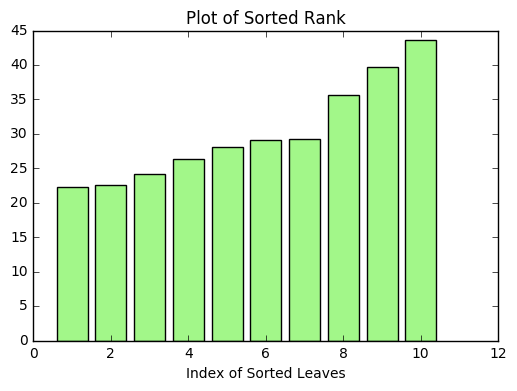

In [7]:
feature_names = X_df.columns
leaf_values = gather_leaf_values(sk_ensemble, X_df,
                                 feature_names,
                                 gather_method='aggregate')

leaf_rank_barplot(leaf_values, n_top=10,
                  rank_method='absolute-sum', print_leaf_paths=True)
plt.show()

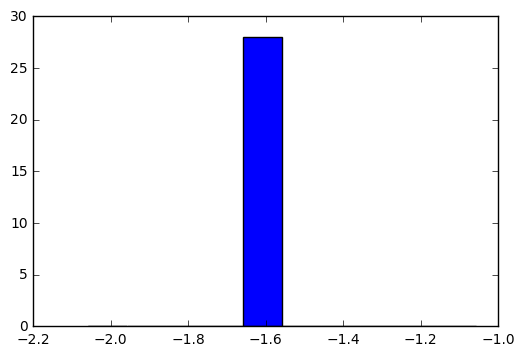

In [9]:
plt.hist(leaf_values["x2<=16.76827 & x2>13.29662 & x2>14.04428"])
plt.show()